# Explore data 
1. Determine effect of temperature on number of bike rides 
2. Controlling for any relevant seasonality

In [2]:
import pandas
READ_PATH = '/Users/calvinperumalla/cbs_data/data_100000_pts.csv'
df = pandas.read_csv(READ_PATH)

In [9]:
df.columns

Index(['Unnamed: 0', 'trip_id', 'year', 'month', 'week', 'day', 'hour',
       'usertype', 'gender', 'starttime', 'stoptime', 'tripduration',
       'temperature', 'events', 'from_station_id', 'from_station_name',
       'latitude_start', 'longitude_start', 'dpcapacity_start',
       'to_station_id', 'to_station_name', 'latitude_end', 'longitude_end',
       'dpcapacity_end'],
      dtype='object')

In [19]:
df_strp = df[['temperature', 'trip_id', 'starttime']]
df_strp['date'] = pandas.to_datetime(df_strp['starttime']).dt.date

/Users/calvinperumalla/cbs_challenge/cbs_challenge/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Plot number of temperature vs rides

In [46]:
#animals.groupby("kind").agg(min_height=pd.NamedAgg(column='height', aggfunc='min'),
df_tmpt_cnt = df_strp.groupby('date').agg(
    num_trips=pandas.NamedAgg(column='trip_id', aggfunc='count'), 
    temperature=pandas.NamedAgg(column='temperature', aggfunc='first')
)

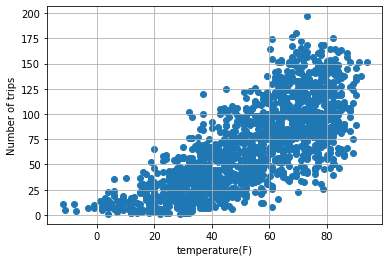

In [51]:
srted = df_tmpt_cnt.sort_values('temperature')
fig, ax = plt.subplots()
ax.scatter(srted['temperature'], srted['num_trips'])
ax.set_xlabel('temperature(F)')
ax.set_ylabel('Number of trips')
ax.grid()